In [1]:
using JSON
using CairoMakie

include("../../Modules/TestingFunctions.jl")
using .TestingFunctions

# Testing number of steps

In [2]:
ON_layered_test_search = Dict(
    "prediction_type" => "single_step",
    "testing_params" => Dict(
        "mask_states_b4_readout" => false,
        "stochastic" => false,
        "stochastic_rescale_V_rec" => false,
        "readout_switching" => false
    ),
    "data" => "Lorenz 0_01",
    "testing_parameter" => "n_steps",
    "ignore_first" => 100,
    "trials" => 30,
    # "total_k" => 288
    "total_k" => 468
)
ON_layered_tests = find_test(ON_layered_test_search)

16-element Vector{Any}:
 Dict{String, Any}("prediction_type" => "single_step", "testing_params" => Dict{String, Any}("stochastic" => false, "mask_states_b4_readout" => false, "stochastic_rescale_V_rec" => false, "readout_switching" => false), "data" => "Lorenz 0_01", "num_partitions" => 1, "error_funcs" => Any["RMSE", "turning_partition_RMSE"], "testing_parameter" => "n_steps", "measurements" => Dict{String, Any}("RMSE" => Dict{String, Any}("minimum" => Any[0.003207414005588087, 0.0086598081923316, 0.015433544954877455, 0.038726247139654044, 0.13963940648986117, 0.5876743034468729, 1.4267185439684402, 2.9786002872305306, 4.5131054258067005, 4.938874423724119, 5.677697186077788], "median" => Any[0.003804958074770518, 0.010149021521602315, 0.020010154003444056, 0.047787356119727176, 0.16210217354985018, 0.6731826958414473, 1.5271861170702112, 3.233694502571411, 4.796853194675766, 5.0221299217818895, 5.883325812792874], "mean" => Any[0.003767663069920225, 0.010289809110082739, 0.020106289

In [3]:
test_dict = Dict()

for test in ON_layered_tests
    if !(test["m"] in [1, 3])
        continue
    end
    test_dict["m = " * string(test["m"])] = test
end


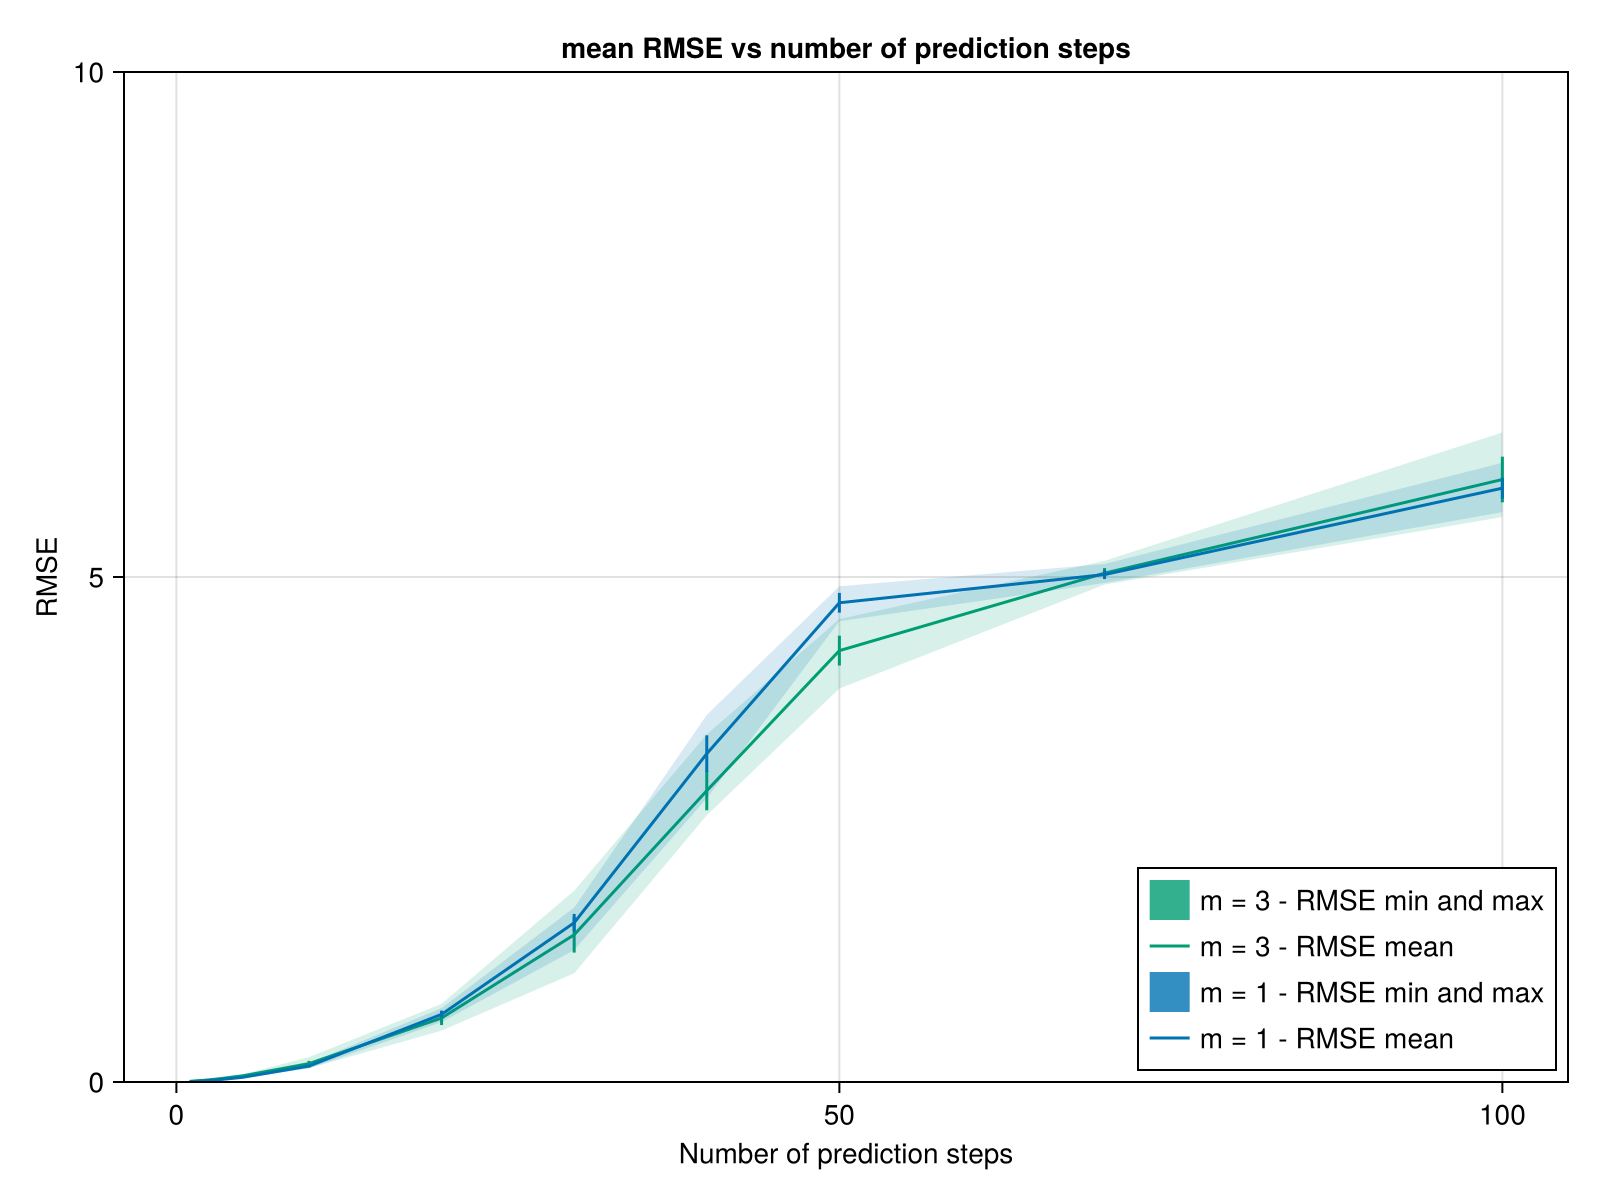

In [4]:
fig = chart_tests(
    "mean RMSE vs number of prediction steps",
    "Number of prediction steps",
    "RMSE",
    test_dict,
    error_funcs=["RMSE"],
    aggregation_funcs=["range", "mean", "std"],
    ylim_low=0,
    ylim_high=10
)

CairoMakie.save("readout_switching_rmse_vs_steps.pdf", fig)

fig

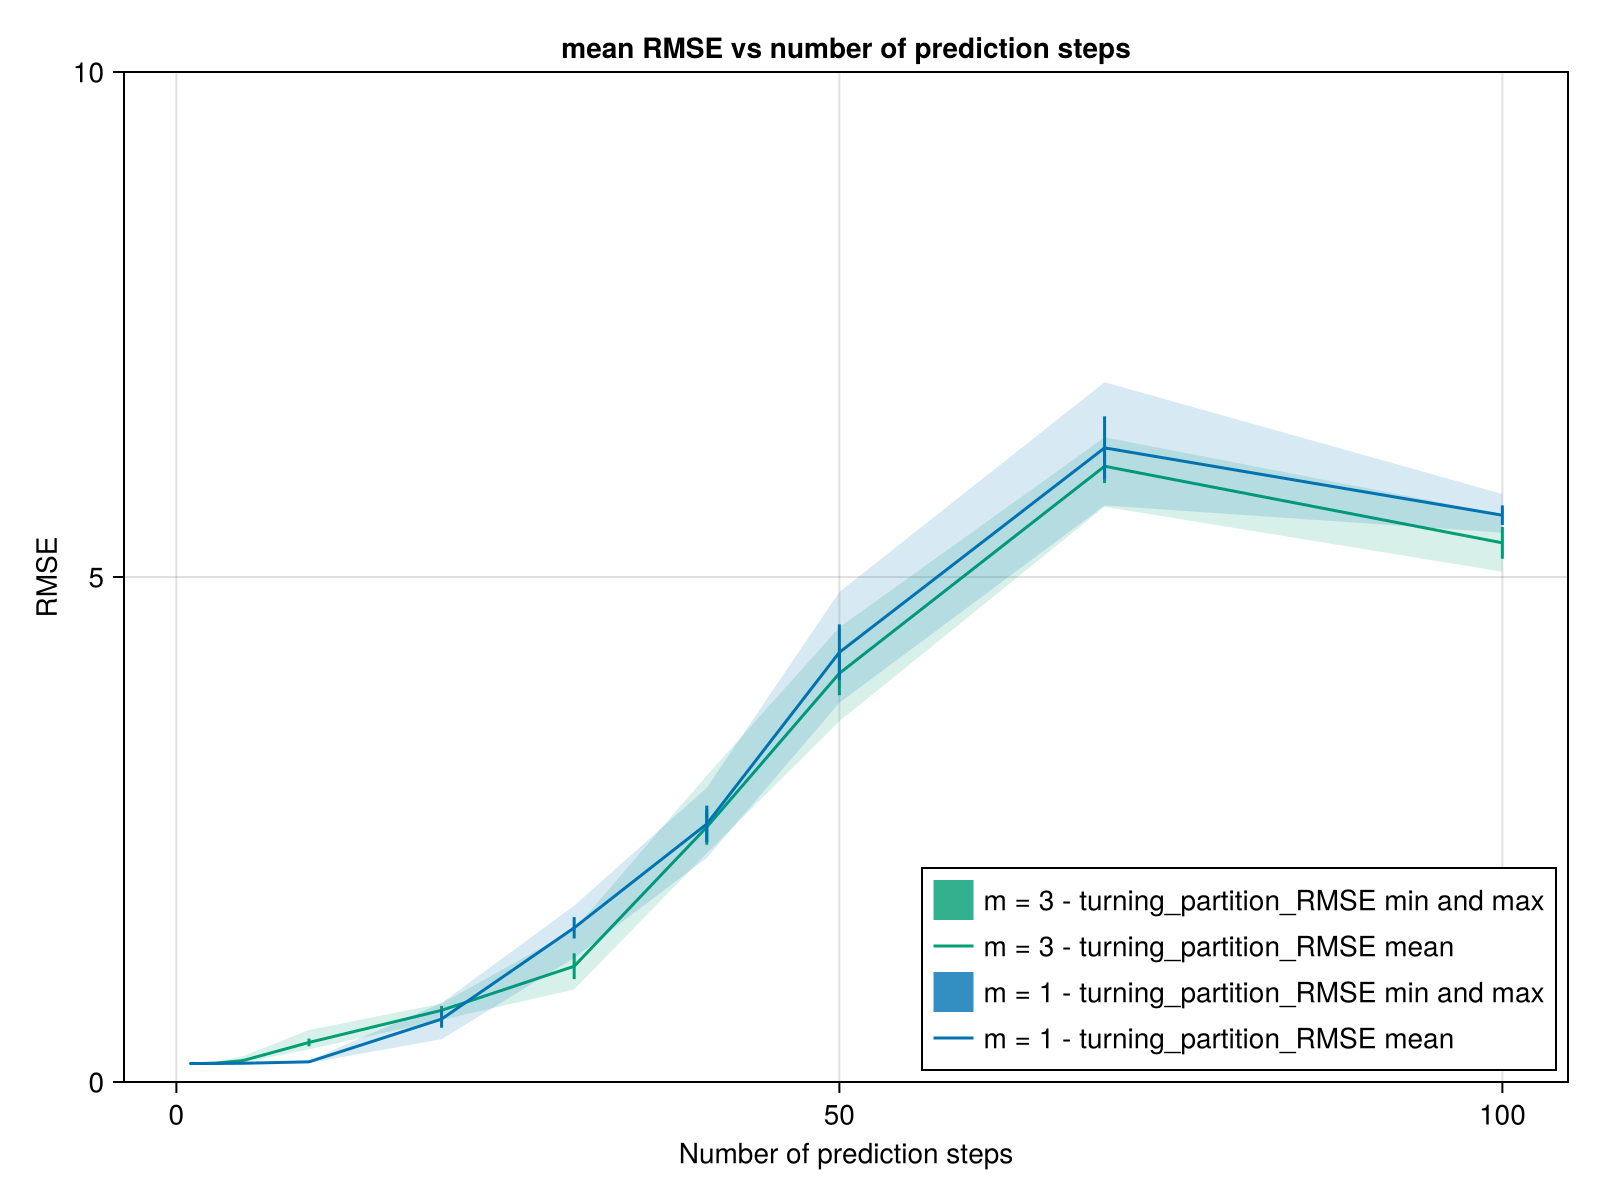

In [5]:
fig = chart_tests(
    "mean RMSE vs number of prediction steps",
    "Number of prediction steps",
    "RMSE",
    test_dict,
    error_funcs=["turning_partition_RMSE"],
    aggregation_funcs=["range", "mean", "std"],
    ylim_low=0,
    ylim_high=10
)

CairoMakie.save("readout_switching_rmse_vs_steps.pdf", fig)

fig